In one way ANOVA, a continious response variable is examined against different levels of one categorical variable.

However if a response variable is being studied against two or multiple categorical variables then its called n-way ANOVA. But for the sake of simplicity we will explore two way ANOVA in this notebook. In two way ANOVA there are two categorical variables having multiple levels.

Here are some important terms explained.

Main effect: The effect of a single variable on the response. For example if we are using gender and post code variable for one city to analyze sale price of a particular product then any change in sale studied against gender or post code alone is called main effect.

Interaction effect: Considering the example of analyzing sale price of product in a city based on gender and post code, so change in both sale price of product based on gender and post code combinition is called interaction effect. In many cases when two variables are studied together then effects are not additive.

We will explore two way ANOVA for ames housing dataset.

In [2]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.graphics.factorplots import interaction_plot

In [7]:
df_ameshousing = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Datasets\\AmesHousing.csv")

In [8]:
df_ameshousing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


For two way ANOVA, we will pick following variables:

1. Heating QC i.e. the quality of heating available in house
2. Season sold : This variable needs to be engineered from month sold.

Seasons feature doesnt exist so we will have to engineer it out of months of sold feature. As Ames Iowa is located in northern hemisphere so we set seasons values as follows:

1. December, January and February are Winter months
2. March , April and May are Spring months
3. June, July and August are Summer months
4. September, October and November are Autumn months

If we were looking into a place which is located in Southern hemisphere then seasons will be mapped to months in a different way because seasons are opposite from northern hemisphere.

In [9]:
df_ameshousing['SeasonOfYear']=df_ameshousing['Mo Sold'].map({12:'Winter', 1:'Winter', 2:'Winter',
                                                             3:'Spring',4:'Spring',5:'Spring',
                                                             6:'Summer',7:'Summer',8:'Summer',
                                                             9: 'Autumn',10:'Autumn',11:'Autumn'} )

In [10]:
df_ameshousing['SeasonOfYear'].isnull().sum()

0

In [11]:
df_ameshousing['Heating QC'].unique()

array(['Fa', 'TA', 'Ex', 'Gd', 'Po'], dtype=object)

Here is explanation of each category:

1. Ex   Excellent
2. Gd   Good
3. TA   Average/Typical
4. Fa   Fair
5. Po   Poor


As there is space in "Heating QC" variable so we will rename it to Heating_QC so that it does not cause issue in some function call. Although it may not cause issue but it is just to be on safe side.

In [12]:
df_ameshousing.rename(columns = {'Heating QC':'Heating_QC'},inplace=True)

Now we will use ols() function from statsmodels.formula.api to find out impact of these two categorical variables and als their interaction effect.

In [14]:
multiple_variables=ols('SalePrice ~ C(SeasonOfYear) + C(Heating_QC) + C(SeasonOfYear): C(Heating_QC) ',data=df_ameshousing).fit()

In [15]:
sms.anova_lm(multiple_variables, typ=2)

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(SeasonOfYear),8.296718e+10,3.0,5.542644,1.862459e-02
C(Heating_QC),6.016033e+12,4.0,301.427003,1.051042e-119
C(SeasonOfYear):C(Heating_QC),8.580682e+10,12.0,1.433087,1.590877e-01
Residual,1.452979e+13,2912.0,NaN,NaN


Here is how we can interpret these results.

p-value for SeasonOfYear <0.05 so it means that is significant contributed in sale price p-value for Heating_QC <0.05 so it is also contributing in sale price p-value for interaction of SeasonOfYear and Heating_QC <0.05 which means that sale price depends upon heating quality and season of year.

This effect can be visualized by plotting an interaction plot.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20824\560563135.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  interaction_plot(df_ameshousing['Heating_QC'],df_ameshousing['SeasonOfYear'],df_ameshousing['SalePrice']).show()


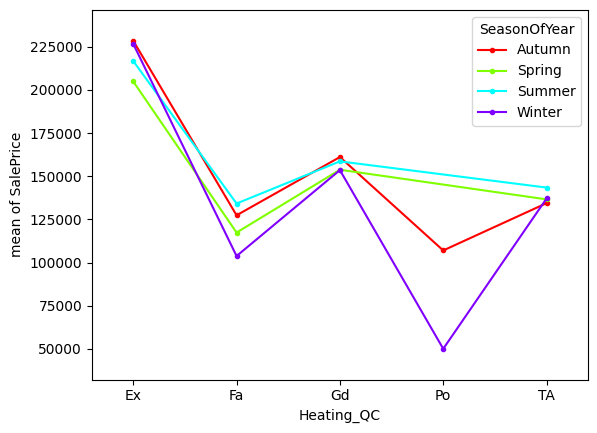

In [16]:
interaction_plot(df_ameshousing['Heating_QC'],df_ameshousing['SeasonOfYear'],df_ameshousing['SalePrice']).show()

As we can see that in Winter season, sale price went down for houses with poor or fair quality heating.